In [1]:
"""Inspect result of ray_pipeline for the cryo_exp dataset"""

'Inspect result of ray_pipeline for the cryo_exp dataset'

In [1]:
import csv
import functools
import importlib
import os

import matplotlib
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import torch
import ray
import sys

from ray.tune.analysis import Analysis

# On slacgpu:
# sys.path.append('/afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/code/vaetree')
print(sys.path)

import analyze
import datasets
import nn
import vis
analyze.reload_libs()

['/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ray/pyarrow_files', '', '/opt/rh/devtoolset-6/root/usr/lib64/python2.7/site-packages', '/opt/rh/devtoolset-6/root/usr/lib/python2.7/site-packages', '/opt/rh/rh-python36/root/usr/lib64/python36.zip', '/opt/rh/rh-python36/root/usr/lib64/python3.6', '/opt/rh/rh-python36/root/usr/lib64/python3.6/lib-dynload', '/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages', '/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages', '/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/IPython/extensions', '/home/nmiolane/.ipython', '/afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/code/vaetree']


Using numpy backend


In [2]:
CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if CUDA else "cpu")
CMAP = 'gray'

# Dataset and Model

In [23]:
analyze.reload_libs()

DATASET_NAME = 'cryo_exp_class_2d'
IMG_SHAPE = (128, 128)
CLASS_2D = 30

# Datasets
DATA_DIR = '/afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/data/cryo'

SHAPE_STR = datasets.get_shape_string(IMG_SHAPE)
DATASET_PATH = os.path.join(
    DATA_DIR, 
    'train_val_datasets/%s_%d_%s.npy' % (
        DATASET_NAME, CLASS_2D, SHAPE_STR))
DATASET = np.load(DATASET_PATH)

LABELS_PATH = os.path.join(
    DATA_DIR, 
    'train_val_datasets/%s_%d_%s_labels.csv' % (
        DATASET_NAME, CLASS_2D, SHAPE_STR))

# Models
RESULTS_DIR = '/afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/'
MAIN_DIR = os.path.join(RESULTS_DIR, 'output_%s' % DATASET_NAME)

METRIC = 'average_loss'
SELECT_DICT = {'class_2d': CLASS_2D}

all_logdirs = analyze.get_all_logdirs(
    main_dir=MAIN_DIR,
    select_dict=SELECT_DICT)

print("Found %d logdirs with parameters:." % len(all_logdirs))
print(SELECT_DICT)

print('\n')

OUTPUT = analyze.get_best_logdir(
    main_dir=MAIN_DIR,
    select_dict=SELECT_DICT,
    metric=METRIC)

Getting logdirs with parameters:
{'class_2d': 30}
Found 69 logdirs with parameters:.
{'class_2d': 30}


Comparing logdirs with parameters:
{'class_2d': 30}
Best logdir with required parameters is /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.028622,lambda_regu=0.60485,latent_dim=3,lr=0.00027014,n_blocks=6_2019-11-08_08-33-059930gc1_


# Create subset

In [4]:
SUB_DATASET_PATH = os.path.join(
    DATA_DIR, 'train_val_datasets/sub_%s_%d_%s.npy' % (
        DATASET_NAME, CLASS_2D, SHAPE_STR))

SUB_LABELS_PATH = os.path.join(
    DATA_DIR, 'train_val_datasets/sub_%s_%d_labels_%s.npy' % (
        DATASET_NAME, CLASS_2D, SHAPE_STR))

N_SUB = 3000
SUB_DATASET = DATASET[:N_SUB]
np.save(SUB_DATASET_PATH, SUB_DATASET)

labels = analyze.get_cryo_labels(labels_path=LABELS_PATH, from_id=1, to_id=N_SUB)
sub_focuses = labels['focus'][:N_SUB]
sub_thetas = labels['theta'][:N_SUB]
with open(SUB_LABELS_PATH, 'w') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['focus', 'theta'])
    for focus, theta in zip(sub_focuses, sub_thetas):
        writer.writerow([focus, theta])

In [5]:
sub_dataset = np.load(SUB_DATASET_PATH)
print(sub_dataset.shape)

(3000, 1, 128, 128)


# Test all logdirs

In [6]:
#i = 16
#OUTPUT = all_logdirs[i]

#epoch_id = 100
#vis.show_img_and_recon(OUTPUT, dataset_path=SUB_DATASET_PATH, epoch_id=epoch_id, cmap=CMAP)

# Show original data

In [7]:
nn.conv_output_size(
    in_shape=(512, 8, 8), 
    out_channels=1024, 
    kernel_size=nn.ENC_KS, 
    stride=nn.ENC_STR, 
    padding=nn.ENC_PAD, 
    dilation=nn.ENC_DIL)

(1024, 4, 4)

Loading /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/data/cryo/train_val_datasets/sub_cryo_exp_class_2d_30_128x128.npy
Dataset shape: (3000, 1, 128, 128)


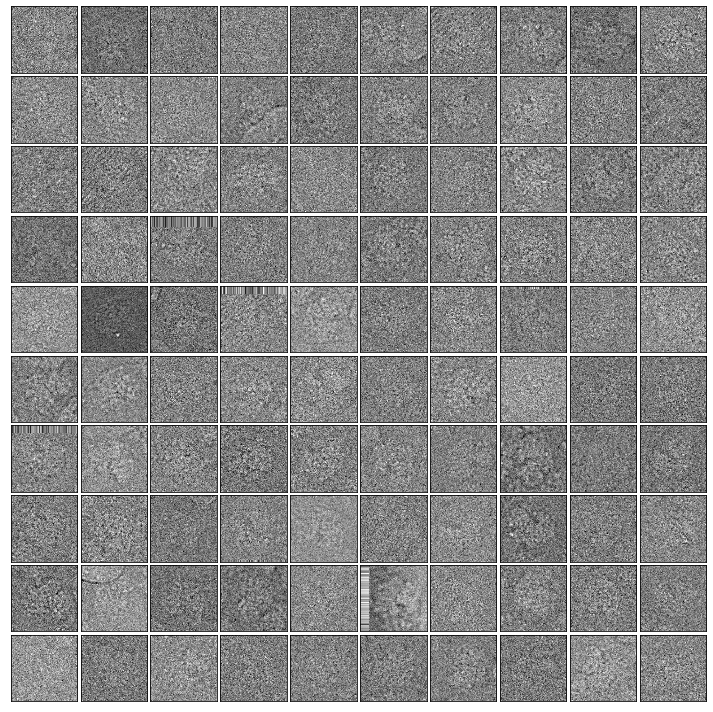

In [8]:
vis.show_data(SUB_DATASET_PATH, nrows=10, ncols=10, figsize=(10, 10))
plt.subplots_adjust(hspace=0.051, wspace=0.05)

Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.028622,lambda_regu=0.60485,latent_dim=3,lr=0.00027014,n_blocks=6_2019-11-08_08-33-059930gc1_/checkpoint_85/epoch_85_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.028622,lambda_regu=0.60485,latent_dim=3,lr=0.00027014,n_blocks=6_2019-11-08_08-33-059930gc1_/checkpoint_85/epoch_85_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.028622,lambda_regu=0.60485,latent_dim=3,lr=0.00027014,n_blocks=6_2019-11-08_08-33-059930gc1_/checkpoint_85/epoch_85_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output

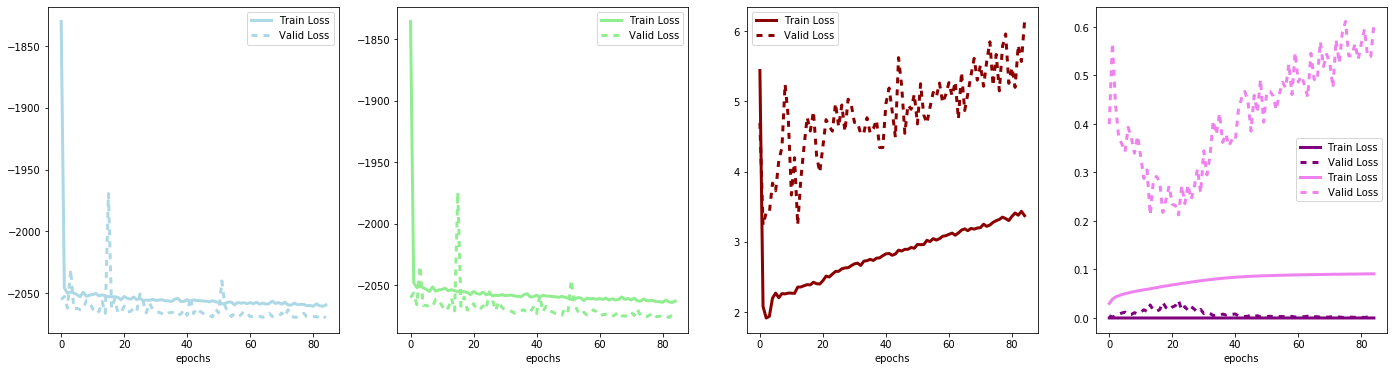

In [9]:
vis.plot_losses(OUTPUT)

Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.028622,lambda_regu=0.60485,latent_dim=3,lr=0.00027014,n_blocks=6_2019-11-08_08-33-059930gc1_/checkpoint_85/epoch_85_checkpoint.pth.


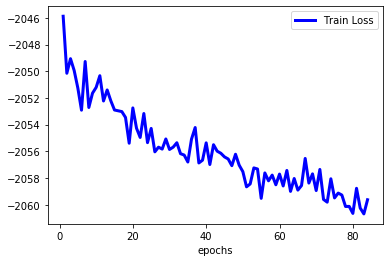

In [10]:
fig = plt.figure()
ax = fig.add_subplot()
vis.plot_criterion(ax=ax, output=OUTPUT, crit_name='total', start_epoch_id=1)

Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.028622,lambda_regu=0.60485,latent_dim=3,lr=0.00027014,n_blocks=6_2019-11-08_08-33-059930gc1_/checkpoint_85/epoch_85_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.028622,lambda_regu=0.60485,latent_dim=3,lr=0.00027014,n_blocks=6_2019-11-08_08-33-059930gc1_/checkpoint_85/epoch_85_checkpoint.pth.
Loading encoder from network of architecture: conv_orig...


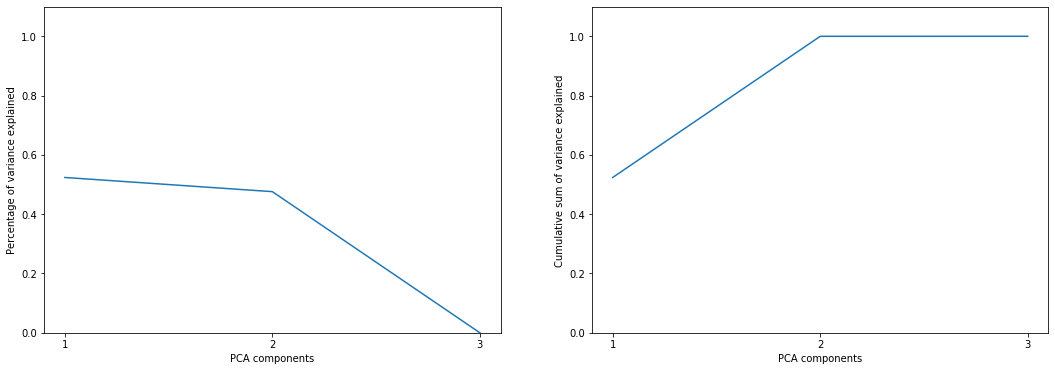

In [11]:
ax = vis.plot_variance_explained(OUTPUT, SUB_DATASET_PATH)

In [12]:
_, labels = analyze.get_cryo(OUTPUT, DATASET_PATH, LABELS_PATH)

Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.028622,lambda_regu=0.60485,latent_dim=3,lr=0.00027014,n_blocks=6_2019-11-08_08-33-059930gc1_/checkpoint_85/epoch_85_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.028622,lambda_regu=0.60485,latent_dim=3,lr=0.00027014,n_blocks=6_2019-11-08_08-33-059930gc1_/checkpoint_85/epoch_85_checkpoint.pth.
Loading encoder from network of architecture: conv_orig...
(4917, 3)


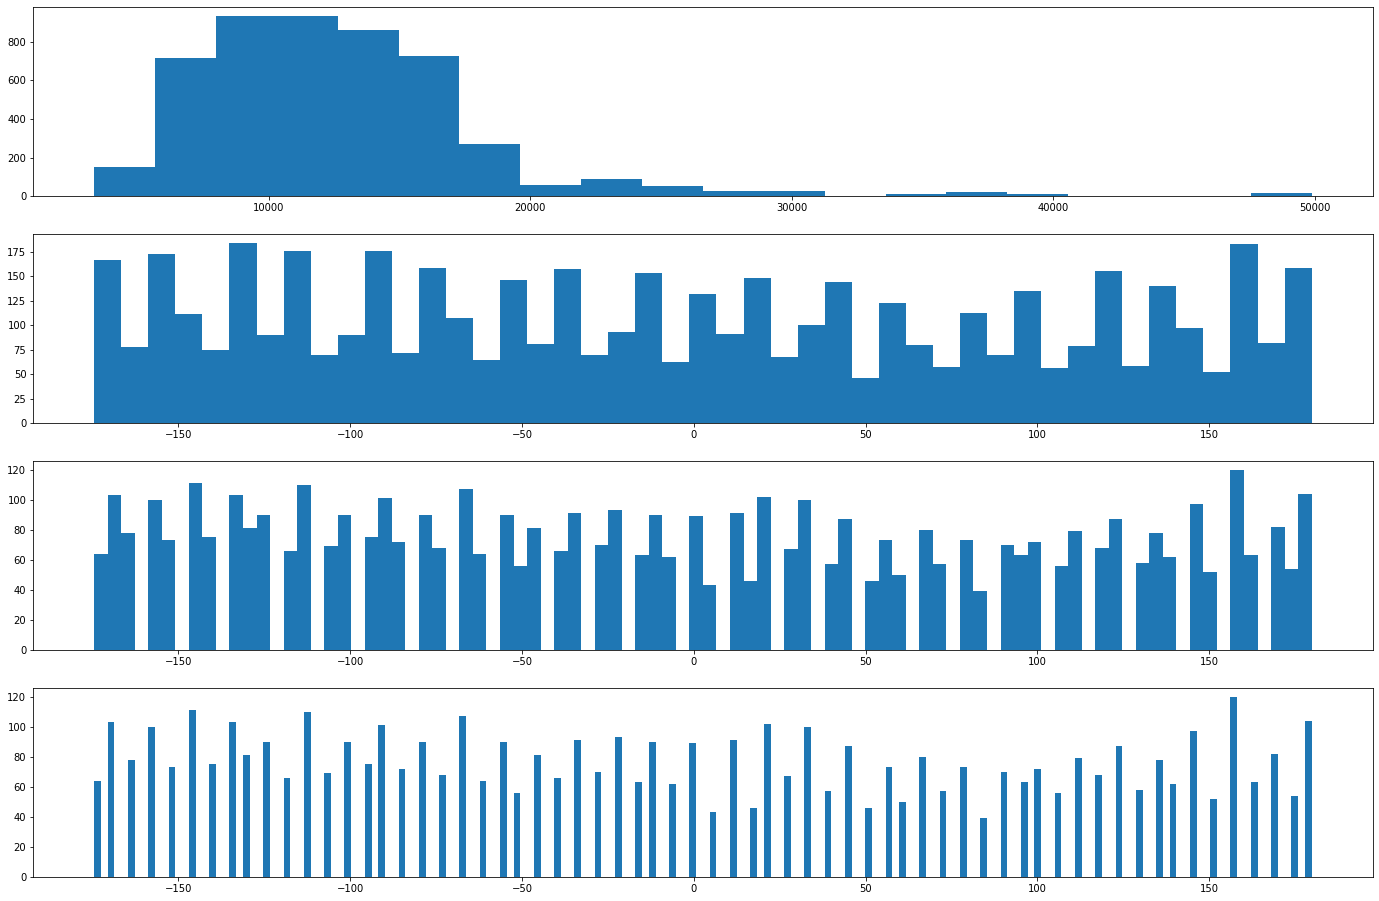

In [13]:
vis.hist_labels(labels)

Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.028622,lambda_regu=0.60485,latent_dim=3,lr=0.00027014,n_blocks=6_2019-11-08_08-33-059930gc1_/checkpoint_85/epoch_85_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.028622,lambda_regu=0.60485,latent_dim=3,lr=0.00027014,n_blocks=6_2019-11-08_08-33-059930gc1_/checkpoint_85/epoch_85_checkpoint.pth.
Loading encoder from network of architecture: conv_orig...
(4917, 3)


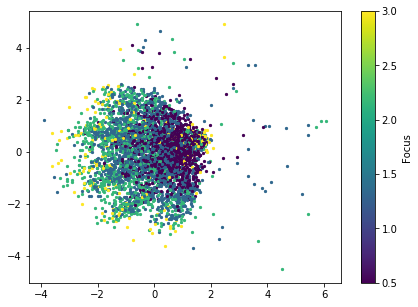

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

im, ax = vis.plot_cryo(ax, OUTPUT, DATASET_PATH, LABELS_PATH)
cb = fig.colorbar(im, ax=ax)
focus = cb.set_label('Focus')
yticklabels = cb.ax.set_yticklabels(np.arange(start=0.5, stop=5.5, step=0.5))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.028622,lambda_regu=0.60485,latent_dim=3,lr=0.00027014,n_blocks=6_2019-11-08_08-33-059930gc1_/checkpoint_95/epoch_95_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.028622,lambda_regu=0.60485,latent_dim=3,lr=0.00027014,n_blocks=6_2019-11-08_08-33-059930gc1_/checkpoint_95/epoch_95_checkpoint.pth.
Loading encoder from network of architecture: conv_orig...
(4917, 3)


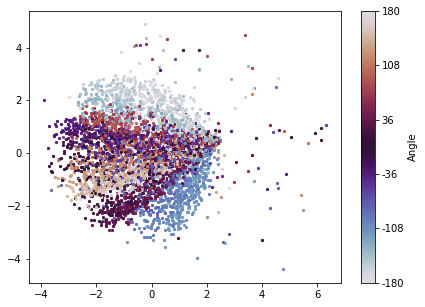

In [22]:
import matplotlib.cm as cm
colormap_tw = cm.get_cmap('twilight')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

im, ax = vis.plot_cryo(ax, OUTPUT, DATASET_PATH, LABELS_PATH, label_name='theta')
cb = fig.colorbar(cm.ScalarMappable(cmap=colormap_tw), ax=ax)
angle = cb.set_label('Angle')

yticklabels = cb.ax.set_yticklabels(np.arange(start=-180, stop=181, step=72))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.028622,lambda_regu=0.60485,latent_dim=3,lr=0.00027014,n_blocks=6_2019-11-08_08-33-059930gc1_/checkpoint_90/epoch_90_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.028622,lambda_regu=0.60485,latent_dim=3,lr=0.00027014,n_blocks=6_2019-11-08_08-33-059930gc1_/checkpoint_90/epoch_90_checkpoint.pth.
Loading encoder from network of architecture: conv_orig...
(4917, 3)


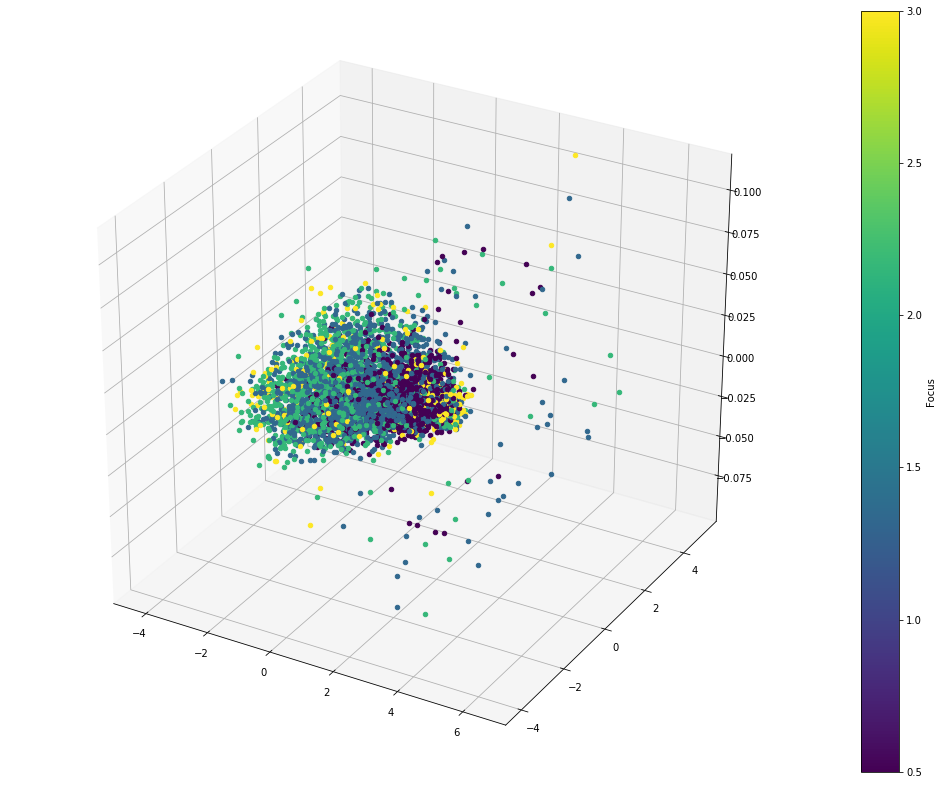

In [16]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure(figsize=(18, 14))
ax = fig.add_subplot(111, projection='3d')

im, ax = vis.plot_cryo(ax, OUTPUT, DATASET_PATH, LABELS_PATH, n_pc=3)
cb = fig.colorbar(im, ax=ax)
focus = cb.set_label('Focus')
yticklabels = cb.ax.set_yticklabels(np.arange(start=0.5, stop=3.5, step=0.5))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.028622,lambda_regu=0.60485,latent_dim=3,lr=0.00027014,n_blocks=6_2019-11-08_08-33-059930gc1_/checkpoint_90/epoch_90_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.028622,lambda_regu=0.60485,latent_dim=3,lr=0.00027014,n_blocks=6_2019-11-08_08-33-059930gc1_/checkpoint_90/epoch_90_checkpoint.pth.
Loading encoder from network of architecture: conv_orig...
(4917, 3)


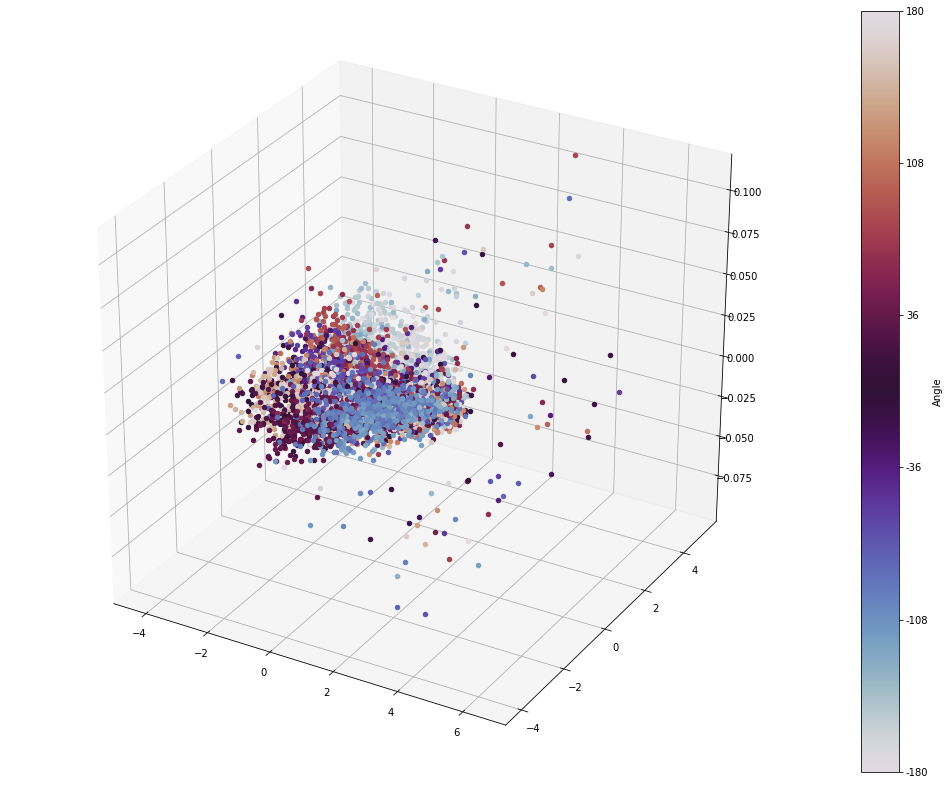

In [17]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure(figsize=(18, 14))
ax = fig.add_subplot(111, projection='3d')

im, ax = vis.plot_cryo(ax, OUTPUT, DATASET_PATH, LABELS_PATH, n_pc=3, label_name='theta')
cb = fig.colorbar(cm.ScalarMappable(cmap=colormap_tw), ax=ax)
angle = cb.set_label('Angle')
yticklabels = cb.ax.set_yticklabels(np.arange(start=-180, stop=181, step=72))

Loading /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/data/cryo/train_val_datasets/cryo_exp_class_2d_30_128x128.npy
Dataset shape: (4917, 1, 128, 128)
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.028622,lambda_regu=0.60485,latent_dim=3,lr=0.00027014,n_blocks=6_2019-11-08_08-33-059930gc1_/checkpoint_5/epoch_5_checkpoint.pth.
Loading encoder from network of architecture: conv_orig...
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.028622,lambda_regu=0.60485,latent_dim=3,lr=0.00027014,n_blocks=6_2019-11-08_08-33-059930gc1_/checkpoint_5/epoch_5_checkpoint.pth.
Loading decoder from network of architecture: conv_orig...
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_2d=3

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

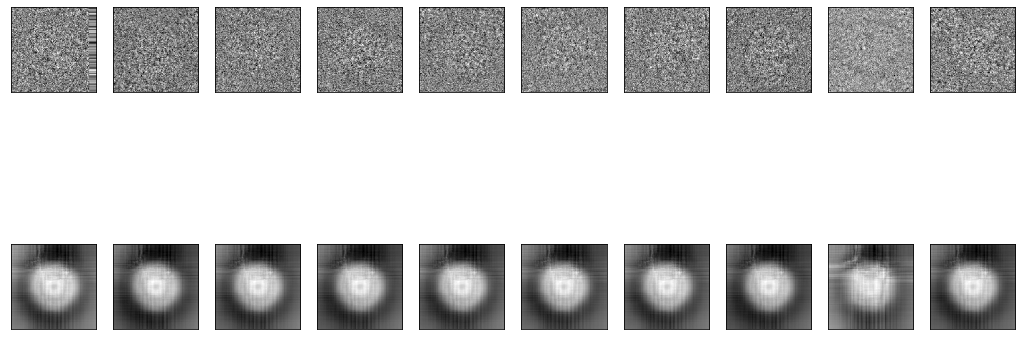

In [18]:
analyze.reload_libs()

epoch_id = 5
vis.show_img_and_recon(OUTPUT, dataset_path=DATASET_PATH, epoch_id=epoch_id, cmap=CMAP)

Loading /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/data/cryo/train_val_datasets/cryo_exp_class_2d_30_128x128.npy
Dataset shape: (4917, 1, 128, 128)
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.028622,lambda_regu=0.60485,latent_dim=3,lr=0.00027014,n_blocks=6_2019-11-08_08-33-059930gc1_/checkpoint_50/epoch_50_checkpoint.pth.
Loading encoder from network of architecture: conv_orig...
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.028622,lambda_regu=0.60485,latent_dim=3,lr=0.00027014,n_blocks=6_2019-11-08_08-33-059930gc1_/checkpoint_50/epoch_50_checkpoint.pth.
Loading decoder from network of architecture: conv_orig...
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

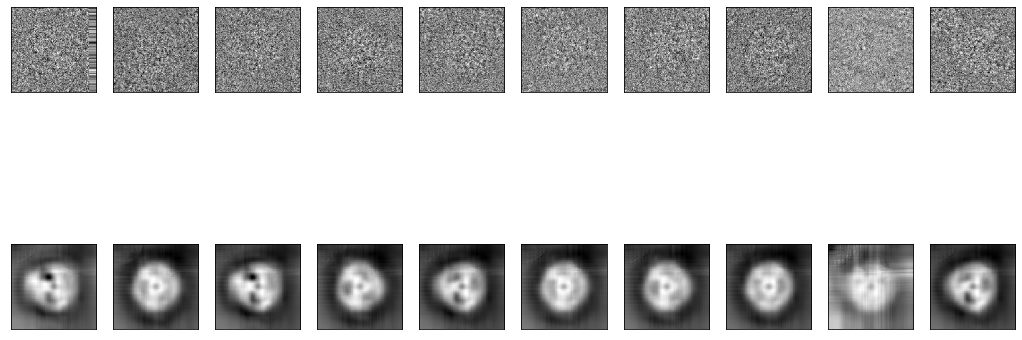

In [19]:
epoch_id = 50
vis.show_img_and_recon(OUTPUT, dataset_path=DATASET_PATH, epoch_id=epoch_id, cmap=CMAP)

Loading /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/data/cryo/train_val_datasets/cryo_exp_class_2d_30_128x128.npy
Dataset shape: (4917, 1, 128, 128)
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.028622,lambda_regu=0.60485,latent_dim=3,lr=0.00027014,n_blocks=6_2019-11-08_08-33-059930gc1_/checkpoint_90/epoch_90_checkpoint.pth.
Loading encoder from network of architecture: conv_orig...
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.028622,lambda_regu=0.60485,latent_dim=3,lr=0.00027014,n_blocks=6_2019-11-08_08-33-059930gc1_/checkpoint_90/epoch_90_checkpoint.pth.
Loading decoder from network of architecture: conv_orig...
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_22_class_

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

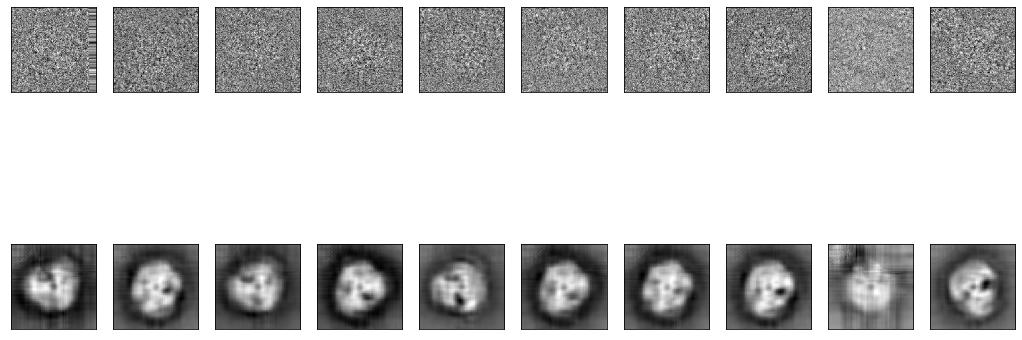

In [21]:
epoch_id = 90
vis.show_img_and_recon(OUTPUT, dataset_path=DATASET_PATH, epoch_id=epoch_id, cmap=CMAP)